In [1]:
# Loading libraries
import pandas as pd

In [2]:
# Loading Data set 

df = pd.read_csv("Solar_Footprints_V2_5065925295652909767.csv")

In [3]:
df.head()

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425


In [4]:
# Attempting to understand the structure of the data 
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OBJECTID                                             5397 non-null   int64  
 1   County                                               5397 non-null   object 
 2   Acres                                                5397 non-null   float64
 3   Install Type                                         5397 non-null   object 
 4   Urban or Rural                                       5397 non-null   object 
 5   Combined Class                                       5397 non-null   object 
 6   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 7   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 8   Substation Name GTET 100 Max Voltage                 5397 non-null  

(5397, 21)

### Streamline the `df` DataFrame by removing non-essential columns to focus on relevant data for solar analysis.

### Approach and Rationale

We create a list of columns to drop, each with a specific reason:

- **`OBJECTID`**: Unique identifier with no analytical value.
- **`Combined Class`**: Redundant data already covered by `Install Type` and `Urban or Rural`.
- **`HIFLD ID (GTET 100 Max Voltage)`, `HIFLD ID (GTET 200 Max Voltage)`, `HIFLD ID (CAISO)`**: Substation identifiers not required for this analysis.

Dropping these columns improves focus and processing speed, keeping only meaningful data. Using `errors='ignore'` ensures smooth execution even if any column is missing.

In [5]:
# Dropping non-essential columns as identified, with a brief reason for each

# List of columns to drop
columns_to_drop = [
    'OBJECTID',              # Unique identifier with no analytical value
    'Combined Class',        # Redundant information already available in 'Install Type' and 'Urban or Rural'
    'HIFLD ID (GTET 100 Max Voltage)',     # Substation identifier, not needed for analysis
    'HIFLD ID (GTET 200 Max Voltage)',     # Substation identifier, not needed for analysis
    'HIFLD ID (CAISO)'        # Substation identifier, not needed for analysis
   


]

# Dropping columns
solar_data_cleaned = df.drop(columns=columns_to_drop,errors='ignore')




The code `solar_data_cleaned.isnull().sum()` calculates the total number of missing values in each column of the `solar_data_cleaned` DataFrame. This summary helps identify any columns with missing data that may require further attention, such as filling, dropping, or other data cleaning methods, to ensure data completeness and reliability for analysis.

In [6]:
# Finding if there arae any missing values that needs to be given attention to 
solar_data_cleaned.isnull().sum()

County                                                  0
Acres                                                   0
Install Type                                            0
Urban or Rural                                          0
Distance to Substation (Miles) GTET 100 Max Voltage     0
Percentile (GTET 100 Max Voltage)                       0
Substation Name GTET 100 Max Voltage                    0
Distance to Substation (Miles) GTET 200 Max Voltage     0
Percentile (GTET 200 Max Voltage)                       0
Substation Name GTET 200 Max Voltage                    0
Distance to Substation (Miles) CAISO                    0
Percentile (CAISO)                                      0
Substation CASIO Name                                  10
Solar Technoeconomic Intersection                       0
Shape__Area                                             0
Shape__Length                                           0
dtype: int64

### Filling Missing Values

The code fills missing values in the `Substation CASIO Name` column of the `solar_data_cleaned` DataFrame with the placeholder `"Unknown"`. This approach retains records with missing substation names while clearly indicating cases where the information is unavailable, preserving data integrity and completeness for further analysis.

In [7]:
# Filling missing values in 'Substation_CAISO' with the placeholder "Unknown"
solar_data_cleaned['Substation CASIO Name'] = solar_data_cleaned['Substation CASIO Name'].fillna("Unknown")


# Verify that there are no remaining missing values
missing_values_after_filling = solar_data_cleaned.isnull().sum()
missing_values_after_filling


County                                                 0
Acres                                                  0
Install Type                                           0
Urban or Rural                                         0
Distance to Substation (Miles) GTET 100 Max Voltage    0
Percentile (GTET 100 Max Voltage)                      0
Substation Name GTET 100 Max Voltage                   0
Distance to Substation (Miles) GTET 200 Max Voltage    0
Percentile (GTET 200 Max Voltage)                      0
Substation Name GTET 200 Max Voltage                   0
Distance to Substation (Miles) CAISO                   0
Percentile (CAISO)                                     0
Substation CASIO Name                                  0
Solar Technoeconomic Intersection                      0
Shape__Area                                            0
Shape__Length                                          0
dtype: int64

### To determine 

which regions, urban or rural, have larger solar installation footprints by analyzing the total acreage used for solar installations across counties and classifications.

1. **Aggregate Data by County and Urban/Rural Classification**:
   - Grouping the data by `County` and `Urban or Rural`, then summing the `Acres` column to calculate the total area of solar installations for each combination.This aggregation provides a clear picture of the solar footprint across different regions, allowing for comparison between urban and rural installations within each county.

2. **Box Plot Visualization**:
   - **What we’re doing**: Using a box plot, we visualize the distribution of `Acres` for each County and Urban/Rural classification.
   - **Why this is effective**: The box plot provides a visual summary of the spread and central tendency of solar installation areas, highlighting differences between urban and rural regions. It also reveals any outliers, indicating counties with unusually large or small installations.


This method provides both a numerical and visual comparison, making it easy to interpret which regions tend to have larger solar footprints. The aggregation captures the total footprint, while the box plot illustrates distribution trends across counties and classifications, offering a comprehensive view of urban vs. rural installation sizes.

In [8]:
# Aggregate data by County and Urban or Rural, summing the 'Acres' column
aggregated_data = solar_data_cleaned.groupby(['County', 'Urban or Rural'])['Acres'].sum().reset_index()

In [9]:
aggregated_data

,County,Urban or Rural,Acres
0,Alameda County,Rural,1.939749
1,Alameda County,Urban,405.078807
2,Amador County,Rural,9.747331
3,Butte County,Rural,76.677146
4,Butte County,Urban,52.316805
...,...,...,...
86,Ventura County,Urban,207.113638
87,Yolo County,Rural,109.590984
88,Yolo County,Urban,107.570763
89,Yuba County,Rural,17.192576


In [10]:
# Calculate mean, median, and standard deviation of 'Acres' for each group (County and Urban/Rural)
summary_stats = solar_data_cleaned.groupby(['County', 'Urban or Rural'])['Acres'].agg(['mean', 'median', 'std']).reset_index()


In [11]:
summary_stats


,County,Urban or Rural,mean,median,std
0,Alameda County,Rural,1.939749,1.939749,NaN
1,Alameda County,Urban,2.189615,1.463113,2.358988
2,Amador County,Rural,4.873665,4.873665,6.591390
3,Butte County,Rural,3.067086,1.415019,5.216085
4,Butte County,Urban,1.341457,0.881263,1.223858
...,...,...,...,...,...
86,Ventura County,Urban,3.395306,2.512007,4.425485
87,Yolo County,Rural,4.764825,1.786769,6.490405
88,Yolo County,Urban,2.689269,1.704184,2.647146
89,Yuba County,Rural,2.456082,2.184352,1.284610


To understand which regions—urban or rural—have larger solar installation footprints, we start by grouping the data by county and region type (urban or rural) and summing up the acreage (`Acres`). This allows us to see the total area covered by solar installations in each region type within each county.

Initially, the visualization was cluttered due to the large number of counties. To address this, we applied a filter to keep only the top counties with the largest solar installations. By focusing on these high-impact areas, we create a much cleaner, more insightful view that highlights where significant solar installations are located and whether they tend to be in urban or rural areas.

Using a box plot of the filtered data helps to easily compare the acreage distribution across urban and rural regions within these top counties. This approach effectively reduces noise in the visualization, making it easy to see patterns and differences in solar installation sizes across different types of regions.

<Figure size 1200x600 with 0 Axes>

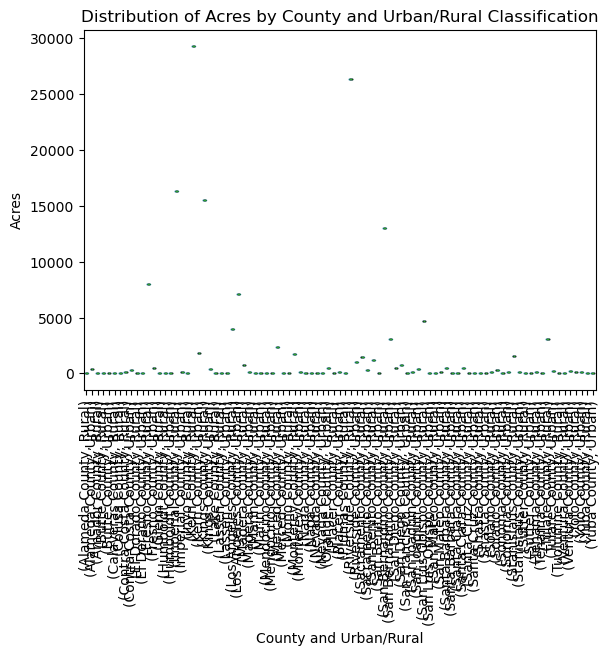

In [12]:
import matplotlib.pyplot as plt

# Create a box plot for the distribution of Acres across different County and Urban/Rural groups
plt.figure(figsize=(12, 6))
aggregated_data.boxplot(column='Acres', by=['County', 'Urban or Rural'], grid=False)
plt.title('Distribution of Acres by County and Urban/Rural Classification')
plt.suptitle('')  # Remove default title for clarity
plt.xlabel('County and Urban/Rural')
plt.ylabel('Acres')
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

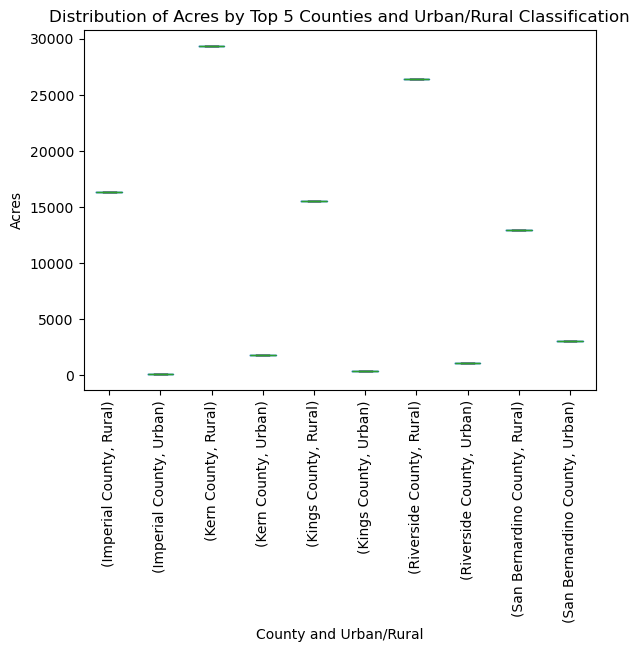

In [13]:
# Define the number of top counties you want to display
top_n = 5  # Adjust this value as needed

# Get the top n counties based on the total acres
top_counties = aggregated_data.groupby('County')['Acres'].sum().nlargest(top_n).index

# Filter the data to include only the top counties
filtered_data = aggregated_data[aggregated_data['County'].isin(top_counties)]

# Create the box plot for the filtered data
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='Acres', by=['County', 'Urban or Rural'], grid=False)
plt.title(f'Distribution of Acres by Top {top_n} Counties and Urban/Rural Classification')
plt.suptitle('')  # Remove default title for clarity
plt.xlabel('County and Urban/Rural')
plt.ylabel('Acres')
plt.xticks(rotation=90)
plt.show()

To address the issue of clutter in the current box plot, this code modifies the plot in two key ways:

1. **Combining Columns for Simplicity**:  
   - A new column, `County_Urban_Rural`, combines the `County` and `Urban or Rural` columns (e.g., "County A - Urban"). This helps organize the data, reducing the complexity of the labels and making each grouping clearer.

2. **Horizontal Box Plot Orientation**:  
   - Displaying the box plot horizontally (`vert=False`) improves readability by aligning the labels along the y-axis. This layout allows for more space to differentiate each grouping, which is particularly useful for longer or more descriptive labels.

This revised approach will improve the clarity of the plot, making it easier to identify patterns in acreage distribution between urban and rural regions within each county.

<Figure size 1200x800 with 0 Axes>

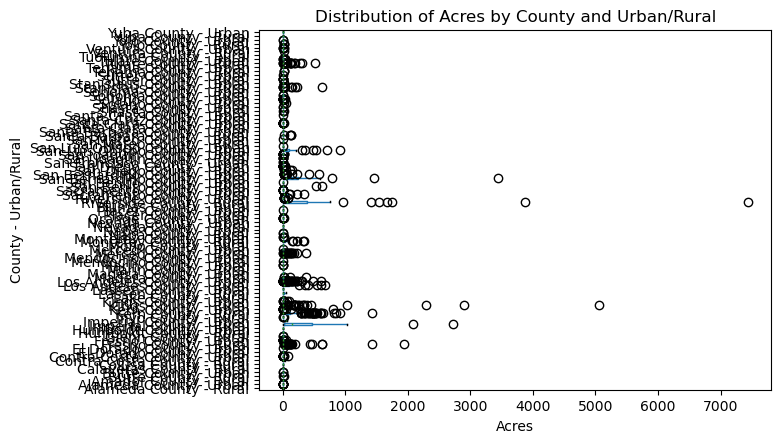

In [14]:

# At the given moment the plot looks cluttered we shall find ways to improve the image 
# also check how many grouped obsevations are available

import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for Acres distribution across different County and Urban/Rural groups
solar_data_cleaned['County_Urban_Rural'] = solar_data_cleaned['County'] + ' - ' + solar_data_cleaned['Urban or Rural']
solar_data_cleaned.boxplot(column='Acres', by='County_Urban_Rural', grid=False, vert=False)

# Formatting the plot
plt.title('Distribution of Acres by County and Urban/Rural')
plt.suptitle('')
plt.xlabel('Acres')
plt.ylabel('County - Urban/Rural')

# Show the plot
plt.show()


This code improves the clarity of the box plot by focusing only on the top counties with the largest solar installation acreage. By filtering to show only these key counties, the plot becomes less cluttered and easier to interpret.

Additionally, combining the `County` and `Urban or Rural` labels into a single label for each grouping provides a clearer view of urban vs. rural differences within each county. Displaying the plot horizontally further enhances readability, especially when dealing with detailed labels.

Overall, these adjustments make it easier to compare solar installation sizes across urban and rural regions in the most impactful counties, giving a straightforward view of where the largest solar footprints are.

<Figure size 1200x800 with 0 Axes>

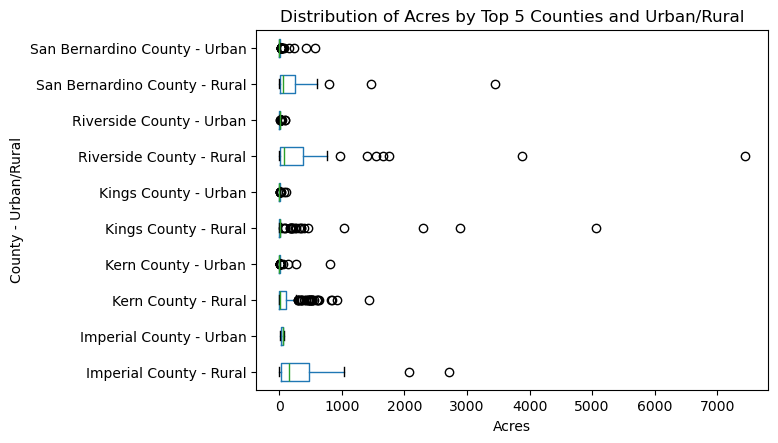

County_Urban_Rural
Kern County - Rural              337
San Bernardino County - Urban    255
Kern County - Urban              186
Riverside County - Urban         131
Kings County - Rural              92
San Bernardino County - Rural     62
Riverside County - Rural          58
Imperial County - Rural           45
Kings County - Urban              45
Imperial County - Urban            3
Name: count, dtype: int64

In [15]:
# Let's write the improved code based on your instructions.

# Define the number of top counties to display
top_n = 5  # You can adjust this number as needed

# Calculate the top counties based on the total sum of 'Acres'
top_counties = solar_data_cleaned.groupby('County')['Acres'].sum().nlargest(top_n).index

# Filter the original data to include only the top counties
solar_data_filtered = solar_data_cleaned[solar_data_cleaned['County'].isin(top_counties)].copy()

# Create a new column combining 'County' and 'Urban or Rural' for easy grouping
solar_data_filtered['County_Urban_Rural'] = solar_data_filtered['County'] + ' - ' + solar_data_filtered['Urban or Rural']

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a horizontal box plot for the filtered data
solar_data_filtered.boxplot(column='Acres', by='County_Urban_Rural', grid=False, vert=False)

# Formatting the plot
plt.title(f'Distribution of Acres by Top {top_n} Counties and Urban/Rural')
plt.suptitle('')  # Remove default automatic suptitle for clarity
plt.xlabel('Acres')
plt.ylabel('County - Urban/Rural')
plt.show()

# Count the number of unique grouped observations
grouped_counts = solar_data_filtered['County_Urban_Rural'].value_counts()
grouped_counts



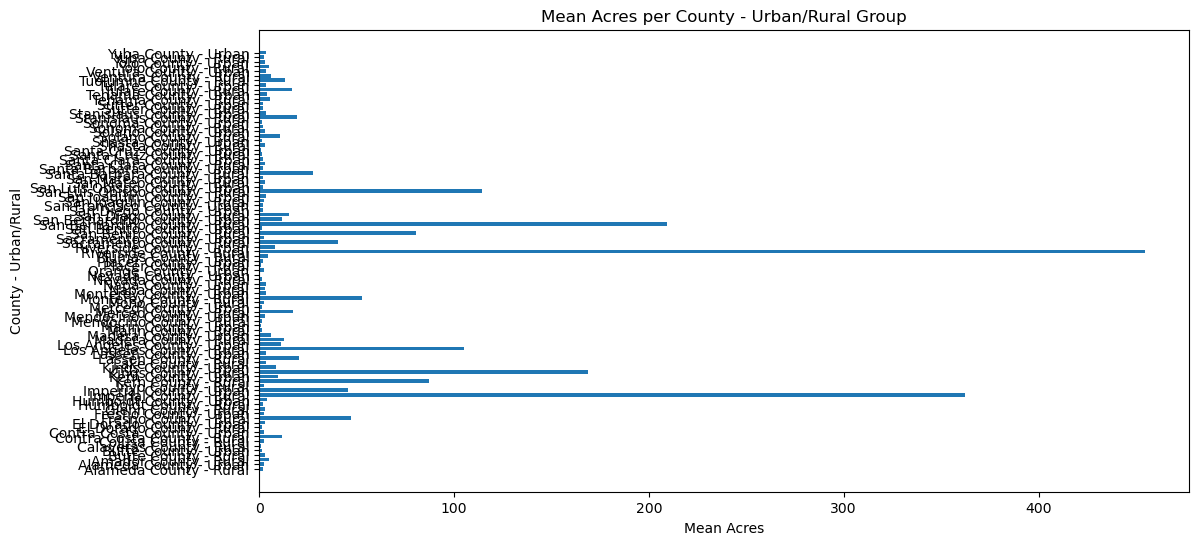

In [16]:
# not determined the use of the analysis or the visual yet.
# Create bar charts for mean and median Acres for each County - Urban/Rural group using summary_stats

# Mean Acres per group
plt.figure(figsize=(12, 6))
plt.barh(summary_stats['County'] + ' - ' + summary_stats['Urban or Rural'], summary_stats['mean'])
plt.title('Mean Acres per County - Urban/Rural Group')
plt.xlabel('Mean Acres')
plt.ylabel('County - Urban/Rural')
plt.show()

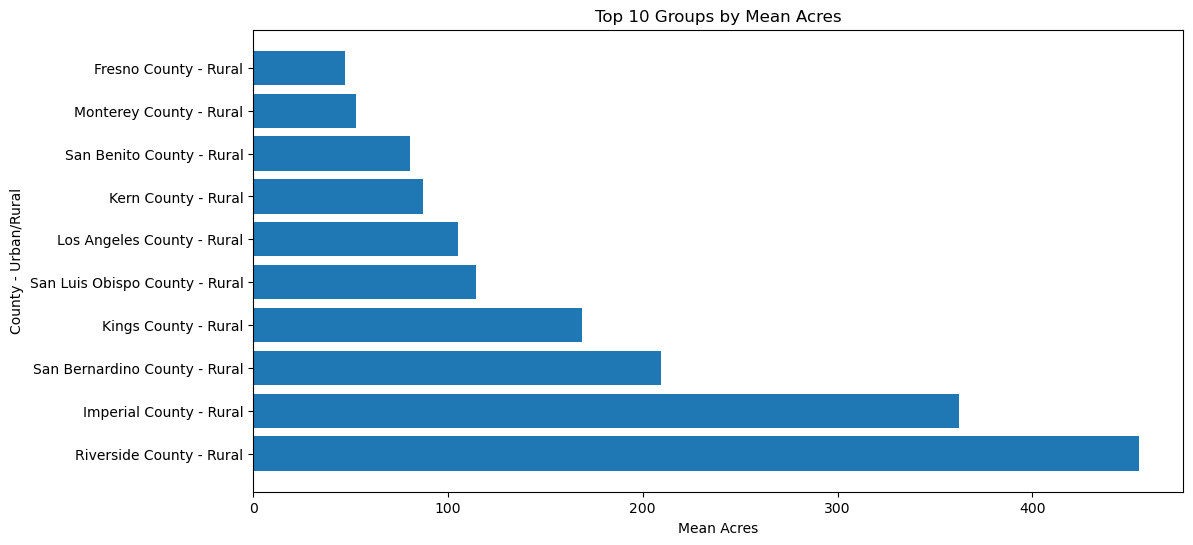

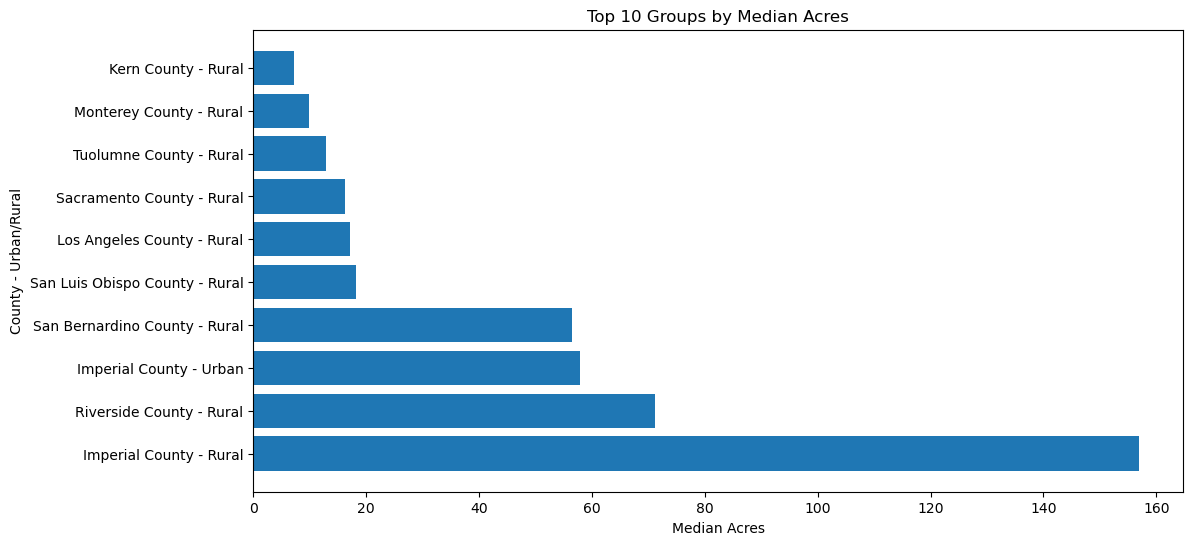

In [17]:
# Define the number of top groups you want to display
N = 10  # Change this to any number of top entries you want

# Filter for the top N groups based on the mean 'Acres'
top_n_mean = summary_stats.nlargest(N, 'mean')

# Bar chart for top N groups by mean Acres
plt.figure(figsize=(12, 6))
plt.barh(top_n_mean['County'] + ' - ' + top_n_mean['Urban or Rural'], top_n_mean['mean'])
plt.title(f'Top {N} Groups by Mean Acres')
plt.xlabel('Mean Acres')
plt.ylabel('County - Urban/Rural')
plt.show()

# Similarly, for the top N groups by median Acres
top_n_median = summary_stats.nlargest(N, 'median')

# Bar chart for top N groups by median Acres
plt.figure(figsize=(12, 6))
plt.barh(top_n_median['County'] + ' - ' + top_n_median['Urban or Rural'], top_n_median['median'])
plt.title(f'Top {N} Groups by Median Acres')
plt.xlabel('Median Acres')
plt.ylabel('County - Urban/Rural')
plt.show()

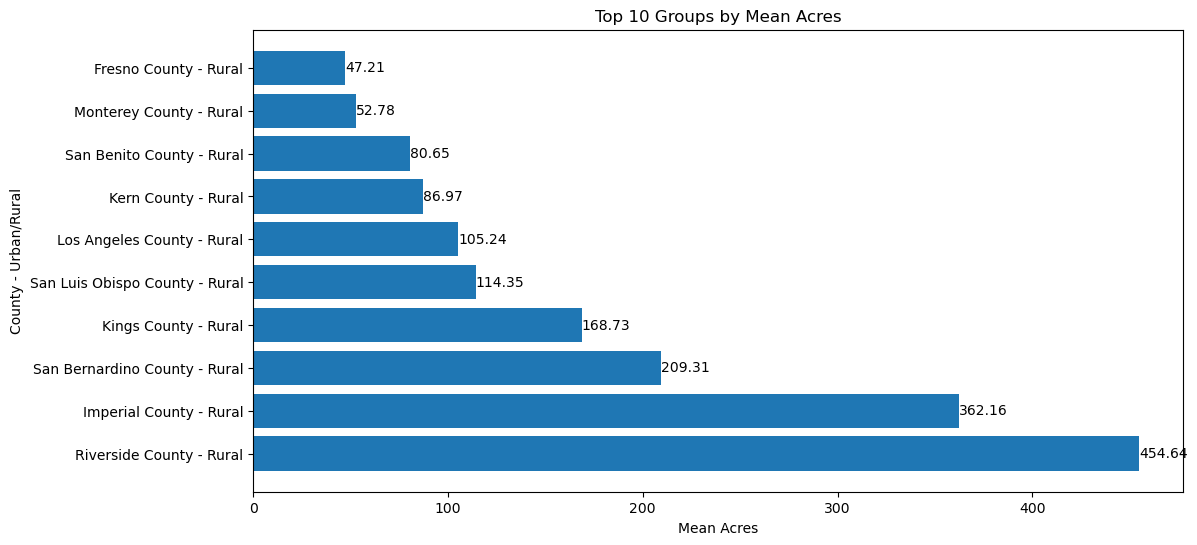

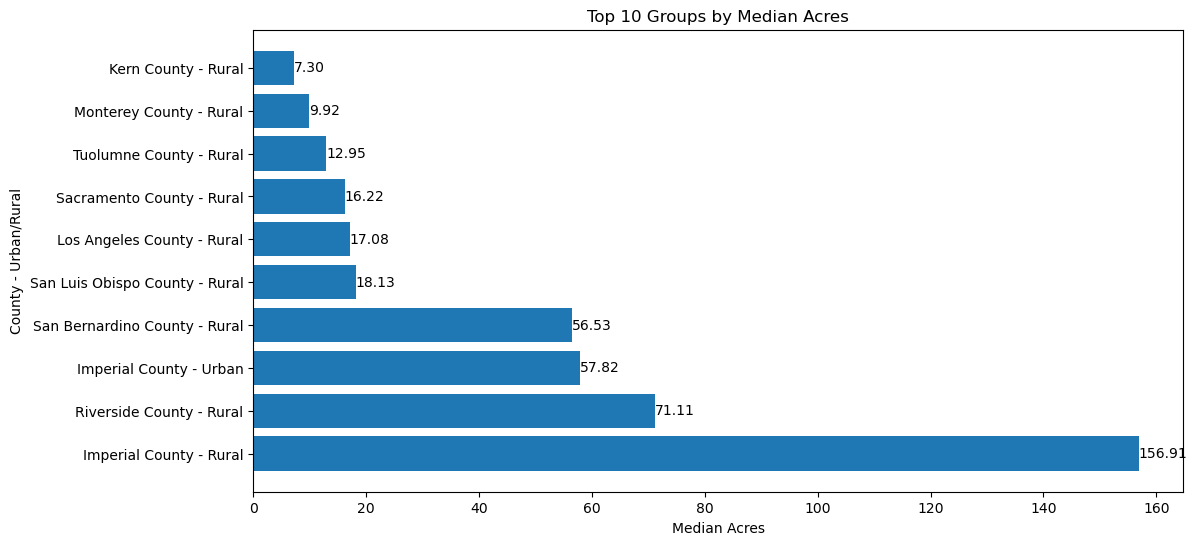

In [18]:
# Define the number of top groups to display
N = 10  # You can change this to the desired top number

# Top N groups by mean Acres
top_n_mean = summary_stats.nlargest(N, 'mean')

# Bar chart for top N groups by mean Acres with data labels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_n_mean['County'] + ' - ' + top_n_mean['Urban or Rural'], top_n_mean['mean'])
plt.title(f'Top {N} Groups by Mean Acres')
plt.xlabel('Mean Acres')
plt.ylabel('County - Urban/Rural')

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()

# Top N groups by median Acres
top_n_median = summary_stats.nlargest(N, 'median')

# Bar chart for top N groups by median Acres with data labels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_n_median['County'] + ' - ' + top_n_median['Urban or Rural'], top_n_median['median'])
plt.title(f'Top {N} Groups by Median Acres')
plt.xlabel('Median Acres')
plt.ylabel('County - Urban/Rural')

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()


In [19]:
# Identify columns related to "Distance to Substation (Miles)"
distance_columns = [col for col in solar_data_cleaned.columns if 'Distance to Substation (Miles)' in col]

# Display the column names and a sample of the first few rows for each relevant column to check units
print("Distance to Substation (Miles) columns:", distance_columns)
print("\nSample values from each 'Distance to Substation (Miles)' column:")
print(solar_data_cleaned[distance_columns].head())

Distance to Substation (Miles) columns: ['Distance to Substation (Miles) GTET 100 Max Voltage', 'Distance to Substation (Miles) GTET 200 Max Voltage', 'Distance to Substation (Miles) CAISO']

Sample values from each 'Distance to Substation (Miles)' column:
   Distance to Substation (Miles) GTET 100 Max Voltage  \
0                                           0.162732     
1                                           0.226728     
2                                           0.426104     
3                                           0.491306     
4                                           0.795822     

   Distance to Substation (Miles) GTET 200 Max Voltage  \
0                                           2.272283     
1                                           2.392816     
2                                           2.537298     
3                                           2.626699     
4                                           2.728629     

   Distance to Substation (Miles) CAISO  
0  

In [20]:
# Checking for unique values and any inconsistencies in the 'Urban or Rural' column
urban_rural_values = solar_data_cleaned['Urban or Rural'].value_counts(dropna=False)

# Checking for missing values across the dataset
missing_values = solar_data_cleaned.isnull().sum()

urban_rural_values, missing_values[missing_values > 0]


(Urban or Rural
 Urban    3631
 Rural    1766
 Name: count, dtype: int64,
 Series([], dtype: int64))

In [21]:
# Calculating the mean, median, standard deviation, and IQR for Distance to Substation (Miles)
# separately for Urban and Rural installations in each relevant distance column.

# Selecting the distance-related columns
distance_columns = [col for col in solar_data_cleaned.columns if 'Distance to Substation (Miles)' in col]

# Initializing a dictionary to store the results
stats_summary = {}

# Calculating stats for each distance column separately for Urban and Rural
for col in distance_columns:
    stats_summary[col] = {
        'Urban': {
            'mean': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][col].mean(),
            'median': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][col].median(),
            'std_dev': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][col].std(),
            'IQR': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][col].quantile(0.75) - solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][col].quantile(0.25),
        },
        'Rural': {
            'mean': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][col].mean(),
            'median': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][col].median(),
            'std_dev': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][col].std(),
            'IQR': solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][col].quantile(0.75) - solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][col].quantile(0.25),
        }
    }

# Display the statistical summary
stats_summary


{'Distance to Substation (Miles) GTET 100 Max Voltage': {'Urban': {'mean': 4.073135231003997,
   'median': 2.20547419017796,
   'std_dev': 5.219500561894095,
   'IQR': 3.0624142283046507},
  'Rural': {'mean': 6.524332063600632,
   'median': 4.960591364513645,
   'std_dev': 5.979347482952182,
   'IQR': 6.081036101191768}},
 'Distance to Substation (Miles) GTET 200 Max Voltage': {'Urban': {'mean': 7.016548271181966,
   'median': 4.53022529422242,
   'std_dev': 7.240069847074396,
   'IQR': 6.297859672944005},
  'Rural': {'mean': 13.09631685946057,
   'median': 10.4701227600098,
   'std_dev': 10.609573726991524,
   'IQR': 11.873167949539665}},
 'Distance to Substation (Miles) CAISO': {'Urban': {'mean': 5.664370498040919,
   'median': 4.26261117551014,
   'std_dev': 4.397101725403102,
   'IQR': 5.31416278973264},
  'Rural': {'mean': 8.182581278370131,
   'median': 6.637694383289095,
   'std_dev': 6.361607942220679,
   'IQR': 7.1194035874508605}}}

In [22]:
# Calculate descriptive statistics (mean, median, standard deviation, IQR) for each of the specified distance columns
# Separately for Urban and Rural installations

# Define a function to calculate the required statistics
def calculate_statistics(df, column_name):
    stats = {
        'Mean': df[column_name].mean(),
        'Median': df[column_name].median(),
        'Standard Deviation': df[column_name].std(),
        'IQR': df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    }
    return stats

# List of distance columns to analyze
distance_columns = [
    'Distance to Substation (Miles) GTET 100 Max Voltage',
    'Distance to Substation (Miles) GTET 200 Max Voltage',
    'Distance to Substation (Miles) CAISO'
]

# Separate data for Urban and Rural installations
urban_data = solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban']
rural_data = solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural']

# Calculate statistics for each column and each group (Urban and Rural)
statistics_results = {}

for column in distance_columns:
    statistics_results[column] = {
        'Urban': calculate_statistics(urban_data, column),
        'Rural': calculate_statistics(rural_data, column)
    }

statistics_results


{'Distance to Substation (Miles) GTET 100 Max Voltage': {'Urban': {'Mean': 4.073135231003997,
   'Median': 2.20547419017796,
   'Standard Deviation': 5.219500561894095,
   'IQR': 3.0624142283046507},
  'Rural': {'Mean': 6.524332063600632,
   'Median': 4.960591364513645,
   'Standard Deviation': 5.979347482952182,
   'IQR': 6.081036101191768}},
 'Distance to Substation (Miles) GTET 200 Max Voltage': {'Urban': {'Mean': 7.016548271181966,
   'Median': 4.53022529422242,
   'Standard Deviation': 7.240069847074396,
   'IQR': 6.297859672944005},
  'Rural': {'Mean': 13.09631685946057,
   'Median': 10.4701227600098,
   'Standard Deviation': 10.609573726991524,
   'IQR': 11.873167949539665}},
 'Distance to Substation (Miles) CAISO': {'Urban': {'Mean': 5.664370498040919,
   'Median': 4.26261117551014,
   'Standard Deviation': 4.397101725403102,
   'IQR': 5.31416278973264},
  'Rural': {'Mean': 8.182581278370131,
   'Median': 6.637694383289095,
   'Standard Deviation': 6.361607942220679,
   'IQR': 

Exploring how proximity to substations differs between urban and rural solar installations by creating scatter plots and histograms for each distance measure.

1. **Scatter Plots (Acres vs. Distance to Substation)**:
   - For each distance column, a scatter plot is generated to show the relationship between `Acres` and `Distance to Substation` for both urban and rural installations.
   - By plotting `Acres` against each distance metric separately for urban (blue) and rural (orange) groups, we can visually compare how solar installation sizes correlate with proximity to substations in different regions.

2. **Histograms (Distance Distribution)**:
   - Separate histograms are plotted for each distance column, comparing urban and rural distributions side by side.
   - The histograms show how distances to substations are distributed within urban and rural areas, highlighting any concentration of installations near or far from substations based on the region type.

This approach helps identify whether urban and rural solar installations tend to be closer or farther from substations, giving insight into possible geographic or infrastructural patterns in solar placements across regions.

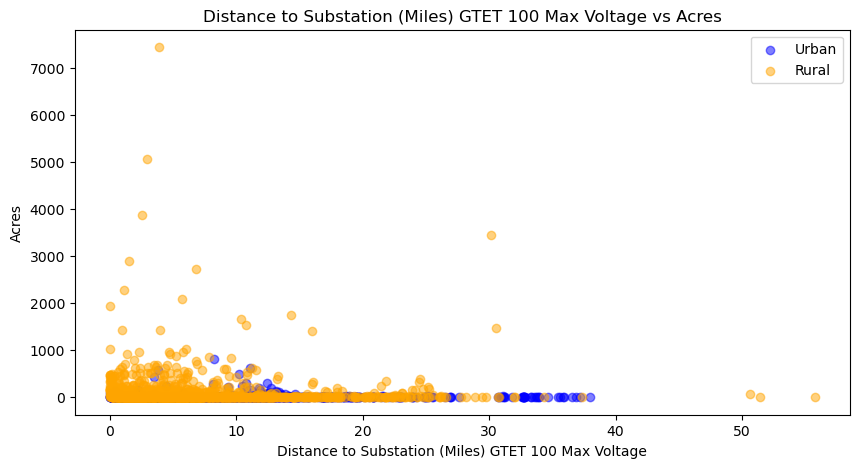

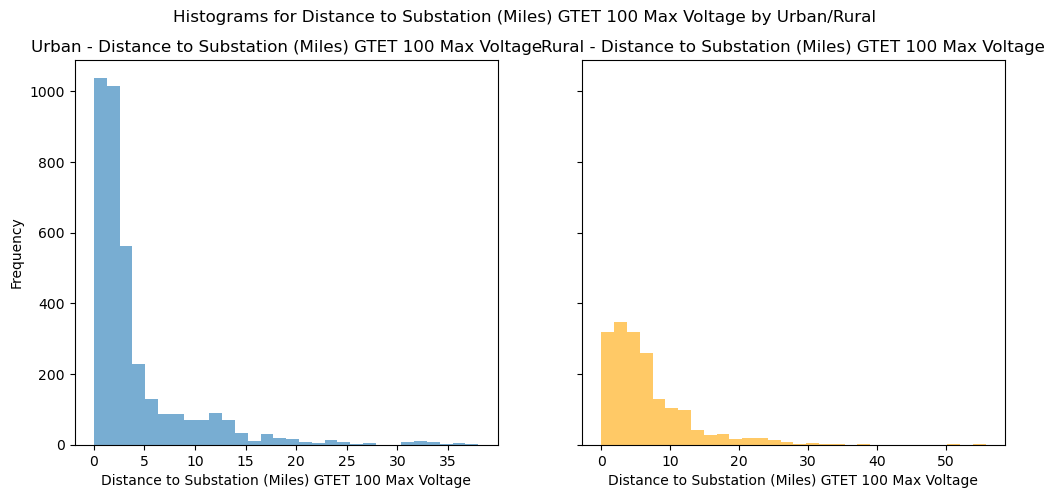

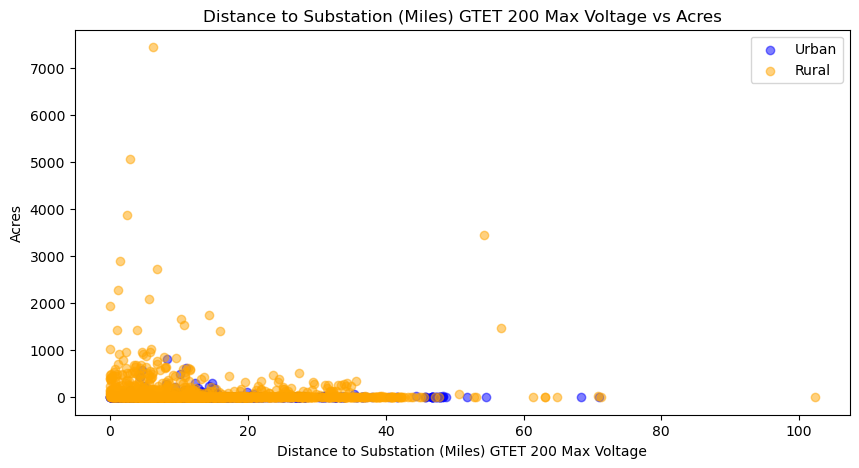

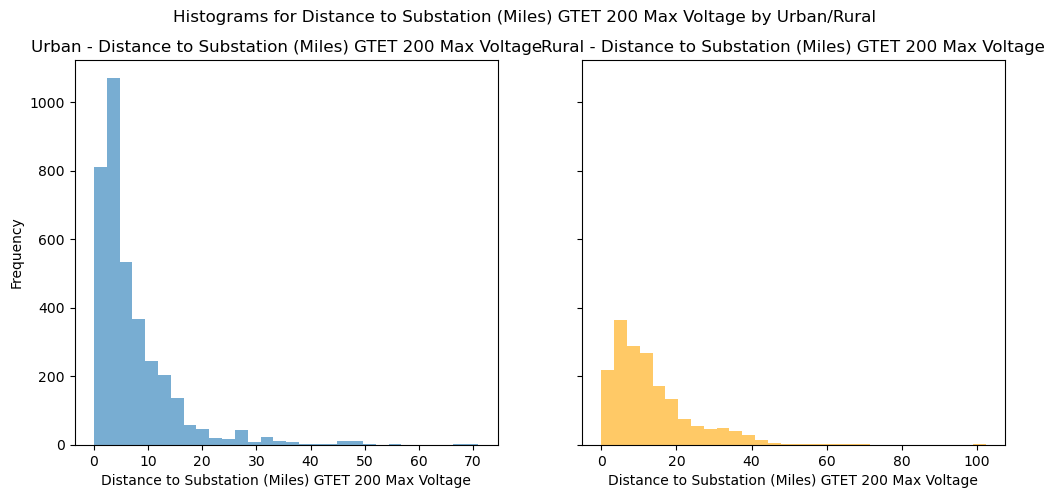

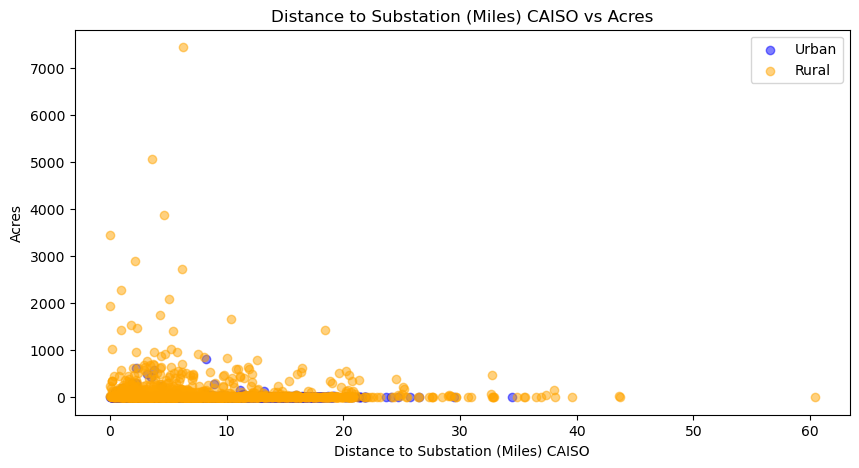

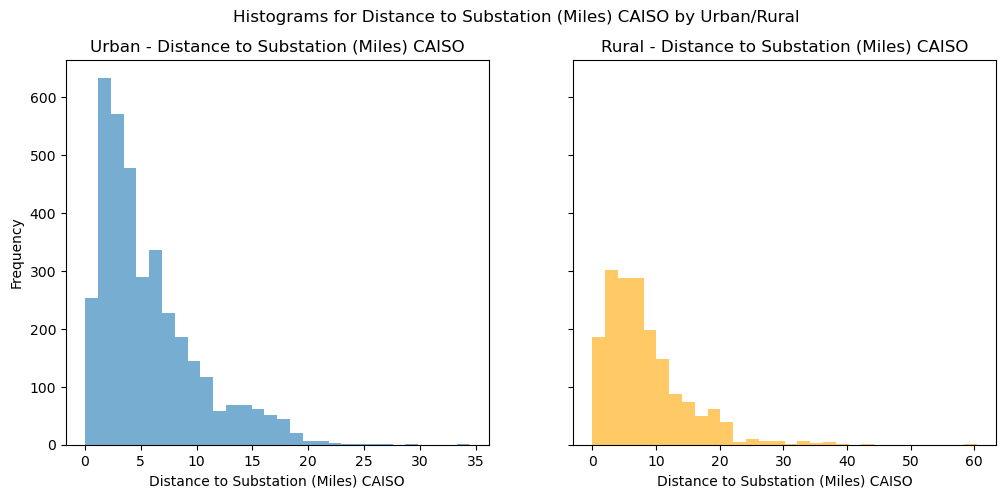

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming solar_data_cleaned is the DataFrame with cleaned numeric data

# List of distance columns to analyze
distance_columns = [
    'Distance to Substation (Miles) GTET 100 Max Voltage',
    'Distance to Substation (Miles) GTET 200 Max Voltage',
    'Distance to Substation (Miles) CAISO'
]

# Separate scatter and histogram plots for Urban and Rural groups for each distance column
for column in distance_columns:
    plt.figure(figsize=(10, 5))

    # Scatter plot for Acres vs Distance
    plt.scatter(solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][column],
                solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban']['Acres'],
                alpha=0.5, label='Urban', color='blue')
    plt.scatter(solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][column],
                solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural']['Acres'],
                alpha=0.5, label='Rural', color='orange')
    
    # Adding titles and labels
    plt.title(f'{column} vs Acres')
    plt.xlabel(column)
    plt.ylabel('Acres')
    plt.legend()
    plt.show()

    # Histograms for Urban and Rural
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    ax1.hist(solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban'][column], bins=30, alpha=0.6)
    ax1.set_title(f'Urban - {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')

    ax2.hist(solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural'][column], bins=30, alpha=0.6, color='orange')
    ax2.set_title(f'Rural - {column}')
    ax2.set_xlabel(column)

    plt.suptitle(f'Histograms for {column} by Urban/Rural')
    plt.show()


In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame
urban_stats = solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Urban']['Distance to Substation (Miles) GTET 100 Max Voltage'].describe()
rural_stats = solar_data_cleaned[solar_data_cleaned['Urban or Rural'] == 'Rural']['Distance to Substation (Miles) GTET 100 Max Voltage'].describe()





In [25]:
urban_stats

count    3631.000000
mean        4.073135
std         5.219501
min         0.011345
25%         1.157675
50%         2.205474
75%         4.220090
max        38.003411
Name: Distance to Substation (Miles) GTET 100 Max Voltage, dtype: float64

In [26]:

rural_stats

count    1766.000000
mean        6.524332
std         5.979347
min         0.000000
25%         2.499044
50%         4.960591
75%         8.580080
max        55.746475
Name: Distance to Substation (Miles) GTET 100 Max Voltage, dtype: float64